<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

In [0]:
from tensorflow import keras
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


# Perceptrón multicapa- Ejemplo

Usualmente los bancos realizan una segmentación de sus clientes de acuerdo a características que posean, estas características se definen con base a la información recolectada de cada cliente a partir de su historia con la entidad, esto permitirá al banco tener diferentes capos de acción a los cuales atacar de acuerdo a las necesidades de cada grupo. Cuando se tiene esta segmentación el paso a seguir, como estrategia de venta, es ofrecer servicios a través de contact centers a cada grupo de acuerdo a lo que se considere pertinente. Uno de estos servicios son los depositos a plazo fijo, por los cuales podemos tener cierta ganancia al dejar nuestro dinero depositado por cierto tiempo en una entidad bancaria, es por esto que para el siguiente ejemplo usaremos un dataset llamado **Bank Marketing Data set**, el cual puede ser encontrado en la siguiente [página web](https://archive.ics.uci.edu/ml/datasets/bank+marketing); este dataset posee información obtenida a partir de unas campañas de marketing realizadas por algunas entidades bancarias portuguesas, en donde se busca a partir de cierta información determinar si el cliente se suscribirá a un déposito a plazo fijo. Para este dataset tenemos los siguientes atributos:

 1-Age (numeric)

 2-job :type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 
 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

 5 - default: has credit in default? (categorical: 'no','yes','unknown')

 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
 
 7 - loan: has personal loan? (categorical: 'no','yes','unknown') 

 **related with the last contact of the current campaign**
 
 8 - contact: contact communication type (categorical: 'cellular','telephone')

 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

 **other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Además de la etiqueta que tenemos:

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


**Nota:** Para mayor información de lo anterior visita los siguientes links:
 [link1](http://media.salford-systems.com/video/tutorial/2015/targeted_marketing.pdf)
[link2](https://core.ac.uk/download/pdf/55616194.pdf)



Iniciamos importando algunas de las librerías que usaremos:



In [0]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


Ahora descargamos los datos haciendo uso de los siguientes comandos

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip

--2020-02-21 02:33:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K  --.-KB/s    in 0.1s    

2020-02-21 02:33:30 (2.83 MB/s) - ‘bank-additional.zip’ saved [444572/444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/

Verificamos que los datos hayan sido descargados

In [0]:
cd bank-additional/

/content/bank-additional


In [0]:
ls

bank-additional.csv*  bank-additional-full.csv*  bank-additional-names.txt


Ahora procedemos a cargar los datos para ver los atributos con los que se cuenta, los cuales fueron descritos al inicio

In [0]:
data=pd.read_csv('bank-additional-full.csv',sep=';',index_col=False)

In [0]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Como tenemos varias variables categóricas lo que haremos es usar el labelEncoder, para pasarlas a términos númericos



In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
data['trabajo']=le.fit_transform(data['job'])
data['marital_c']=le.fit_transform(data['marital'])
data['educacion']=le.fit_transform(data['education'])
data['housing_c']=le.fit_transform(data['housing'])
data['loan_c']=le.fit_transform(data['loan'])
data['contact_c']=le.fit_transform(data['contact'])
data['poutcome_c']=le.fit_transform(data['poutcome'])
data['tag']=le.fit_transform(data['y'])

In [0]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,trabajo,marital_c,educacion,housing_c,loan_c,contact_c,poutcome_c,tag
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3,1,0,0,0,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,0,0,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,2,0,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0,1,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,0,2,1,1,0


Luego de tener esto quitamos las columnas que son categoricas y aquellas que pueden no aportarnos información al momento de entrenar nuestra red.

In [0]:
data=data.drop(columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'])

In [0]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,trabajo,marital_c,educacion,housing_c,loan_c,contact_c,poutcome_c,tag
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,2,0,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,1,1,0


Teniendo esto hacemos nuestra division entre mis datos y etiquetas

In [0]:
X=data.drop(columns=['tag'])
y=data['tag']

In [0]:
X.shape
y.shape

(41188,)

Hacemos una división en mis conjuntos y además normalizamos los datos ya que tenemos escalas bastante diferentes

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [0]:
ss=StandardScaler()

In [0]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [0]:
X_train.shape

(28831, 17)

In [0]:
X_test.shape

(12357, 17)

In [0]:
y_test=y_test.values
y_train = y_train.values


Ahora bien creamos nuestra red multicapa, teniendo en cuenta que tenemos una problema de clasificación binaria.

In [0]:
keras.backend.clear_session()

In [0]:
model= keras.models.Sequential([
                         keras.layers.Dense(50,activation='relu',kernel_initializer='he_uniform',input_shape=(17,)),
                         keras.layers.Dense(25,activation='relu',kernel_initializer='he_uniform'),
                         keras.layers.Dense(10,activation='relu',kernel_initializer='he_uniform'),
                         keras.layers.Dense(1,activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history=model.fit(X_train,y_train,epochs=10)

Train on 28831 samples
Epoch 1/10
28831/28831 [==============================] - 2s 64us/sample - loss: 0.2374 - acc: 0.8964
Epoch 2/10
28831/28831 [==============================] - 2s 58us/sample - loss: 0.1992 - acc: 0.9081
Epoch 3/10
28831/28831 [==============================] - 2s 60us/sample - loss: 0.1944 - acc: 0.9107
Epoch 4/10
28831/28831 [==============================] - 2s 60us/sample - loss: 0.1905 - acc: 0.9122
Epoch 5/10
28831/28831 [==============================] - 2s 60us/sample - loss: 0.1881 - acc: 0.9124
Epoch 6/10
28831/28831 [==============================] - 2s 59us/sample - loss: 0.1849 - acc: 0.9143
Epoch 7/10
28831/28831 [==============================] - 2s 60us/sample - loss: 0.1831 - acc: 0.9141
Epoch 8/10
28831/28831 [==============================] - 2s 58us/sample - loss: 0.1810 - acc: 0.9144
Epoch 9/10
28831/28831 [==============================] - 2s 62us/sample - loss: 0.1792 - acc: 0.9163
Epoch 10/10
28831/28831 [==============================] - 

Text(0.5, 1.0, 'Curvas de validación')

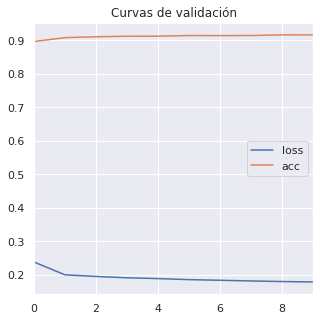

In [0]:
pd.DataFrame(history.history).plot(figsize=(5,5))
plt.title('Curvas de validación')

In [0]:
model.evaluate(X_test,y_test)

12357/12357 [==============================] - 0s 27us/sample - loss: 0.1896 - acc: 0.9071


[0.1896040573604016, 0.9070972]

In [0]:
y_h=model.predict_classes(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
a=confusion_matrix(y_test,y_h)

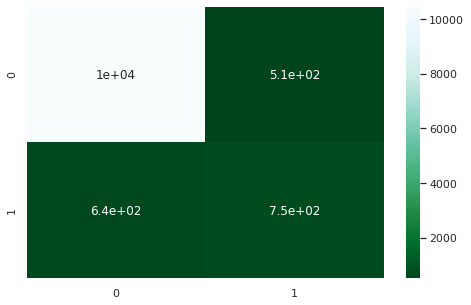

In [0]:
plt.figure(figsize=(8,5))
sns.heatmap(a,annot=True,cmap='BuGn_r')


In [0]:
a

array([[10456,   512],
       [  636,   753]])

## Ejercicio

La ionósfera es la parte de la atmósfera que se encuentra usualmente expuesta a la radiación solar y por tal motivo se mantiene ionizada, lo cual se dá debido a que los gases en estas capas son agitados por la radiación solar para formar iones, que tienen una carga eléctrica. El Ionosphere Data Set contiene información captada por radares, los cuales buscaban detectar electrones libres en esta capa de la atmosfera, donde estas antenas regresaban a partir de señales "good" si detectaban algún elemento en la ionósfera o "bad" en caso contrario.

<p><img alt="Colaboratory logo" height="200px" src="https://t2.ev.ltmcdn.com/es/posts/6/1/7/atmosfera_y_cuales_son_sus_capas_para_ninos_de_primaria_1716_600.jpg" align="center" hspace="10px" vspace="0px"></p>

<p><img alt="Colaboratory logo" height="250px" src="https://archive.ics.uci.edu/ml/assets/MLimages/Large52.jpg" align="center" hspace="10px" vspace="0px"></p>


Para más información pueden ver el siguiente [artículo](https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf). Para nuestro ejercicio buscaremos realizar una red con la cual podamos hacer una clasificación (bad or good). Para eso debemos seguir los siguientes pasos:

  

1.   Descargar los datos desde el siguiente [enlace](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)
2. Carga/llama las librerías que consideres necesarias
3.   Leer los datos y crear las respectivas variable **X** y **Y**.
4.  Encontrar las dimensiones de las variables anteriores
5. Realizar un proceso de encoding si es necesario
6. Dividir nuestros dato, en los datos de entrenamiento y test
7. Construir la red en la que uses el perceptron multi capa, donde apliques los conceptos aprendidos en clase
8. Compila el modelo y haz un fit de los datos
9. Haz un plot de las curvas de validación
11. Encuentra las clases predichas para los datos de test.
10. Realiza la matiz de confusión para este caso


# Ejemplo CNN

Según [este artículo](https://www.researchgate.net/publication/263052166_Automatic_detection_of_invasive_ductal_carcinoma_in_whole_slide_images_with_Convolutional_Neural_Networks) es posible detectar un carcinoma ductal invasivo mediante una red neuronal convolucional. Primero debemos descargar las imagenes que están claificadas dependiendo de si hay o no carcinoma. [Aquí](http://www.andrewjanowczyk.com/use-case-6-invasive-ductal-carcinoma-idc-segmentation/) se encuentra un resumen.

## Datos

Un subconjunto de los datos se encuentran [aquí](https://drive.google.com/drive/folders/1eNV9IszdsBw52URAvBuJoK-O5lxGveLf?usp=sharing), sólo debemos agregarlos a nuestro google drive y montar la unidad

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Exportamos los datos para obtener varias carpetas cada una con los datos de la clase 0 y clase 1

In [0]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/IDC.zip", 'r')
zip_ref.extractall("./")
zip_ref.close()

Después de Extraer los datos usamos glob para obtener todas las imagenes de las subcarpetas

In [0]:
from glob import glob
imagenes = glob('IDC/**/*.png', recursive=True)

Todas las imagenes se convierten a imagenes a color de 50x50 pixeles

In [0]:
import cv2
import numpy as np
def procesarImg(lidx,uidx):
    alto = 50
    ancho = 50
    canales = 3
    x = []
    y = []
    for img in imagenes[lidx:uidx]:
        imagenFull = cv2.imread(img)
        imageRes = (cv2.resize(imagenFull, (alto,ancho), interpolation=cv2.INTER_CUBIC))
        x.append(imageRes)
        if img[-10:]=="class1.png":
            y.append(0)
        elif img[-10:]=="class0.png":
            y.append(1)
        else:
            return
    return x,y

In [0]:
X, Y = procesarImg(0,10000)
X = np.array(X)/255

1

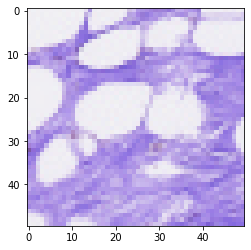

In [0]:
import matplotlib.pyplot as plt
ejemplo=0
plt.imshow(X[ejemplo])
Y[ejemplo]

Se separan los datos en entrenamiento y test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15)
y_train.count(1),y_train.count(0)

(5305, 3195)

## Muestreo Aleatorio

Los datos están muy desbalanceados, hay el triple de datos de la clase 1 que la clase 0. Para lidiar con esto, vamos a hacer un muestreo de los datos para que queden balanceados

In [0]:
X_trainFlat = X_train.reshape(X_train.shape[0], -1)
X_testFlat = X_test.reshape(X_test.shape[0], -1)

In [0]:
from imblearn.under_sampling import RandomUnderSampler
from keras.utils import to_categorical
random_under_sampler = RandomUnderSampler(ratio='majority')
X_trainRos, Y_trainRos = random_under_sampler.fit_sample(X_trainFlat, y_train)
X_testRos, Y_testRos = random_under_sampler.fit_sample(X_testFlat, y_test)
X_trainRos=X_trainRos.reshape((-1,50,50,3))
X_testRos=X_testRos.reshape((-1,50,50,3))
Y_trainRos=to_categorical(Y_trainRos)
Y_testRos=to_categorical(Y_testRos)
(Y_trainRos==1).sum(),(Y_trainRos==0).sum()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(6390, 6390)

## Red Convolucional

Ahora vamos a construir la red convolucional

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
batch_size = 256
num_classes = 2
epochs = 100
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten()) 
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         295168    


Es un problema de clasificación binaria entonces vamos a usar la entropía cruzada

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Podemos aumentar los datos mediante rotaciones y reflexiones

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=180,
    horizontal_flip=True,vertical_flip = True)

Usaremos early stopping y haremos un checkpoint del modelo cada que la pérdida de validación disminuya

In [0]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=3, mode='min')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

## Entrenamiento

In [0]:
training = model.fit_generator(datagen.flow(X_trainRos,Y_trainRos,batch_size=batch_size),steps_per_epoch=len(X_trainRos) / batch_size, epochs=epochs,validation_data=(X_testRos, Y_testRos), verbose=1, callbacks=[early_stopping_monitor, model_checkpoint])




Epoch 1/10




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '





25/24 [==============================] - 7s 288ms/step - loss: 0.6689 - acc: 0.5828 - val_loss: 0.6070 - val_acc: 0.7235

Epoch 00001: val_loss improved from inf to 0.60698, saving model to best_model.h5
Epoch 2/10
25/24 [==============================] - 4s 166ms/step - loss: 0.4679 - acc: 0.8074 - val_loss: 0.4305 - val_acc: 0.8394

Epoch 00002: val_loss improved from 0.60698 to 0.43051, saving model to best_model.h5
Epoch 3/10
25/24 [==============================] - 4s 173ms/step - loss: 0.4303 - acc: 0.8169 - val_loss: 0.3888 - val_acc: 0.8438

Epoch 00003: val_loss improved from 0.43051 to 0.38879, saving model to best_model.h5
Epoch 4/10
25/24 [==============================] - 4s 172ms/step - loss: 0.4006 - acc: 0.8396 - val_loss: 0.3899 - val_acc: 0.8451

Epoch 00004: val_loss did not improve from 0.38879
Epoch 5/10
25/24 [==============================] - 4s 175ms/step - loss: 0.3752 - acc: 0.8462 - val_loss: 0.3491 - val_acc: 0.8686

Epoch 00005: val_loss improved from 0.

## Validación

In [0]:
from keras.models import load_model
from sklearn import metrics
model = load_model('best_model.h5')
y_pred_one_hot = model.predict(X_testRos)
y_pred_labels = np.argmax(y_pred_one_hot, axis = 1)
y_true_labels = np.argmax(Y_testRos,axis=1)
metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

array([[486,  79],
       [ 67, 498]])

##**Problema de CNN**

El siguiente problema tiene como objetivo resolver un problema de clasificación de imágenes de 10 categorias, las cuales están codificadas de la siguiente forma:

- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

1. Importe las librerías necesarias para obtener los datos de `cifar10, construir un modelo de redes neuronales convolucionales y graficar las imágenes.

2. Cargue las imágenes y sus etiquetas y divídalas en dos grupos: entrenamiento y evaluación. Para ello consulte la ayuda de la función `load_data()` que contiene el dataset cifar10.

3. Determine que tipo de tensores que se almacenan en el conjunto de entrenamiento y test (tanto para el conjunto de imágenes como los labels).

4. Normalice las imágenes. Para ello, determine cual es la profundidad de píxel dentro de las imágenes del dataset. Nota: por profundidad de píxel se entiende a los bits necesarios para representar el número almacenado en cada píxel.

5. Grafíque las 25 primeras figuras almacenadas en el conjunto de imágenes de entrenamiento. Ayuda: haga uso de la función `imshow` de `matplotlib`, y fije como argumento dentro de `imshow` `cmap=plt.cm.binary`.

6. Antes de crear su modelo responda las siguientes preguntas:

  - ¿Qué tipo de valriables representan las etiquetas del dataset?.
  - ¿Qué tipo de función de pérdida puede definirse para estas etiquetas?
  - ¿Que tipo de capa puede definirse a la salida del modelo?

7. Cree un modelo secuencial con la siguiente estructura:

  - Capa de convolución 2D cuya entrada deberá ser igual a la dimensión de cada una de las imágenes. Dicha capa deberá estar constituida por **32 filtros**, cada uno de $3\times3$, y una función de activación `relu`.
  - Capa `MaxPoling` de $(2,2)$.
  - Capa de convolución 2D compuesta por 64 filtros de $3\times3$ y función de activación `relu`.
  - Capa `MaxPoling` de $(2,2)$.
  - Capa de convolución 2D compuesta por 64 filtros de $3\times3$ y función de activación `relu`.
  - Capa `flatten` para que la imágen de salida de la capa anterior se convierta en un vector fila.
  - Capa densamente conexa de 64 neuronas y función de activación `relu`
  - Capa densamente conexa de 10 neuronas con la identidad función de activación.

8. Compile el modelo con los siguientes parámetros definidos en el argumento:

  ```
    optimizer='adam',
                loss=keras.losses.SparseCategoricalCrossentrop(from_logits=True),
                metrics=['accuracy']
  ```

9. Entrene el modelo durante 10 época, usando el grupo de evalución como grupo de validación. Almacene dicho entrenamiento en un objeto `history`.

10. Grafique las curvas de aprendizaje almacenadas ene l objeto history.

11. Evalue el desempeño del modelo en el conjunto de evaluación.

# Ejemplo RNN

Usaremos el dataset de Occupancy Detection. Este dataset describe las mediciones de una habitación y el objetivo es predecir si la habitación está ocupada o no. Puede leer mas sobre el data set en este [link](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)

Importemos algunas librerias que necesitaremos

In [0]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Ahora procedamos a importar los datos de entrenamiento y de testeo que se encuntran en el repositorio de github

In [0]:
data_train = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/Occupancy_train.txt')
data_test = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/Occupancy_test.txt')

In [0]:
print('data_train_shape =',data_train.shape, '\ndata_test_shape =',data_test.shape)

data_train_shape = (8143, 7) 
data_test_shape = (2665, 7)


In [0]:
data_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Selecciones las caracteristicas que usaremos para el entrenamiendo, estas seran ['Temperature', 'Humidity', 'Light', 'CO2']

In [0]:
X_train = data_train[data_train.columns[1:-2]]
X_test = data_test[data_test.columns[1:-2]]

Ahora se reescalan los datos

In [0]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_train = pd.DataFrame(X_train , columns=data_train.columns[1:-2])
X_test = pd.DataFrame(X_test , columns=data_test.columns[1:-2])

In [0]:
X_train.head()

,Temperature,Humidity,Light,CO2
0,2.518470,0.278526,1.573763,0.364948
1,2.488967,0.277713,1.591735,0.341881
2,2.488967,0.273645,1.573763,0.340290
3,2.488967,0.265508,1.573763,0.323587
4,2.439796,0.265508,1.573763,0.311655


In [0]:
X_test.head()

,Temperature,Humidity,Light,CO2
0,3.029851,0.097723,2.391247,0.453875
1,3.047553,0.100977,2.356329,0.489510
2,3.059354,0.090129,2.326889,0.518993
3,3.051978,0.071145,1.921656,0.535167
4,3.082956,0.084705,1.895211,0.548689


Procedamos ahora a poner nuestro dataset en una forma adecuada para el modelo, esto es [sample, timestep, features]

In [0]:
def time_setped_data(data_set, time_step, columns):
  data = pd.DataFrame()
  for j in columns:
    for i in range(time_step):
      data['{}(t+{})'.format(j, i)] = data_set[j].shift(-i)

  data.dropna(inplace=True)
  return data

In [0]:
X_train = time_setped_data(data_set=X_train, time_step=20, columns=X_train.columns)
X_test = time_setped_data(data_set=X_test, time_step=20, columns=X_test.columns)

In [0]:
X_train.head()

,Temperature(t+0),Temperature(t+1),Temperature(t+2),Temperature(t+3),Temperature(t+4),Temperature(t+5),Temperature(t+6),Temperature(t+7),Temperature(t+8),Temperature(t+9),Temperature(t+10),Temperature(t+11),Temperature(t+12),Temperature(t+13),Temperature(t+14),Temperature(t+15),Temperature(t+16),Temperature(t+17),Temperature(t+18),Temperature(t+19),Humidity(t+0),Humidity(t+1),Humidity(t+2),Humidity(t+3),Humidity(t+4),Humidity(t+5),Humidity(t+6),Humidity(t+7),Humidity(t+8),Humidity(t+9),Humidity(t+10),Humidity(t+11),Humidity(t+12),Humidity(t+13),Humidity(t+14),Humidity(t+15),Humidity(t+16),Humidity(t+17),Humidity(t+18),Humidity(t+19),Light(t+0),Light(t+1),Light(t+2),Light(t+3),Light(t+4),Light(t+5),Light(t+6),Light(t+7),Light(t+8),Light(t+9),Light(t+10),Light(t+11),Light(t+12),Light(t+13),Light(t+14),Light(t+15),Light(t+16),Light(t+17),Light(t+18),Light(t+19),CO2(t+0),CO2(t+1),CO2(t+2),CO2(t+3),CO2(t+4),CO2(t+5),CO2(t+6),CO2(t+7),CO2(t+8),CO2(t+9),CO2(t+10),CO2(t+11),CO2(t+12),CO2(t+13),CO2(t+14),CO2(t+15),CO2(t+16),CO2(t+17),CO2(t+18),CO2(t+19)
0,2.518470,2.488967,2.488967,2.488967,2.439796,2.439796,2.439796,2.439796,2.439796,2.415210,2.415210,2.439796,2.439796,2.390625,2.341454,2.341454,2.341454,2.287365,2.287365,2.233277,0.278526,0.277713,0.273645,0.265508,0.265508,0.265508,0.265508,0.265508,0.265508,0.260988,0.256468,0.247428,0.259482,0.256468,0.251948,0.251948,0.265508,0.281781,0.299861,0.299861,1.573763,1.591735,1.573763,1.573763,1.573763,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.535251,-0.613726,-0.613726,-0.613726,-0.613726,0.364948,0.341881,0.340290,0.323587,0.311655,0.300520,0.302641,0.294156,0.263400,0.259158,0.266317,0.268703,0.244841,0.257567,0.252795,0.235296,0.238477,0.249613,0.249613,0.262340
1,2.488967,2.488967,2.488967,2.439796,2.439796,2.439796,2.439796,2.439796,2.415210,2.415210,2.439796,2.439796,2.390625,2.341454,2.341454,2.341454,2.287365,2.287365,2.233277,2.233277,0.277713,0.273645,0.265508,0.265508,0.265508,0.265508,0.265508,0.265508,0.260988,0.256468,0.247428,0.259482,0.256468,0.251948,0.251948,0.265508,0.281781,0.299861,0.299861,0.299861,1.591735,1.573763,1.573763,1.573763,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.535251,-0.613726,-0.613726,-0.613726,-0.613726,-0.613726,0.341881,0.340290,0.323587,0.311655,0.300520,0.302641,0.294156,0.263400,0.259158,0.266317,0.268703,0.244841,0.257567,0.252795,0.235296,0.238477,0.249613,0.249613,0.262340,0.263930
2,2.488967,2.488967,2.439796,2.439796,2.439796,2.439796,2.439796,2.415210,2.415210,2.439796,2.439796,2.390625,2.341454,2.341454,2.341454,2.287365,2.287365,2.233277,2.233277,2.233277,0.273645,0.265508,0.265508,0.265508,0.265508,0.265508,0.265508,0.260988,0.256468,0.247428,0.259482,0.256468,0.251948,0.251948,0.265508,0.281781,0.299861,0.299861,0.299861,0.299861,1.573763,1.573763,1.573763,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.535251,-0.613726,-0.613726,-0.613726,-0.613726,-0.613726,-0.613726,0.340290,0.323587,0.311655,0.300520,0.302641,0.294156,0.263400,0.259158,0.266317,0.268703,0.244841,0.257567,0.252795,0.235296,0.238477,0.249613,0.249613,0.262340,0.263930,0.262340
3,2.488967,2.439796,2.439796,2.439796,2.439796,2.439796,2.415210,2.415210,2.439796,2.439796,2.390625,2.341454,2.341454,2.341454,2.287365,2.287365,2.233277,2.233277,2.233277,2.233277,0.265508,0.265508,0.265508,0.265508,0.265508,0.265508,0.260988,0.256468,0.247428,0.259482,0.256468,0.251948,0.251948,0.265508,0.281781,0.299861,0.299861,0.299861,0.299861,0.309805,1.573763,1.573763,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.537818,1.535251,-0.613726,-0.613726,-0.613726,-0.613726,-0.613726,-0.613726,-0.613726,0.323587,0.311655,0.300520,0.302641,0.294156,0.263400,0.259158,0.266317,0.268703,0.244841,0.257567,0.252795,0.235296,0.238477,0.249613,0.249613,0.262340,0.263930,0.262340,0.268703
4,2.439796,2.439796,2.439796,

In [0]:
X_test.head()

,Temperature(t+0),Temperature(t+1),Temperature(t+2),Temperature(t+3),Temperature(t+4),Temperature(t+5),Temperature(t+6),Temperature(t+7),Temperature(t+8),Temperature(t+9),Temperature(t+10),Temperature(t+11),Temperature(t+12),Temperature(t+13),Temperature(t+14),Temperature(t+15),Temperature(t+16),Temperature(t+17),Temperature(t+18),Temperature(t+19),Humidity(t+0),Humidity(t+1),Humidity(t+2),Humidity(t+3),Humidity(t+4),Humidity(t+5),Humidity(t+6),Humidity(t+7),Humidity(t+8),Humidity(t+9),Humidity(t+10),Humidity(t+11),Humidity(t+12),Humidity(t+13),Humidity(t+14),Humidity(t+15),Humidity(t+16),Humidity(t+17),Humidity(t+18),Humidity(t+19),Light(t+0),Light(t+1),Light(t+2),Light(t+3),Light(t+4),Light(t+5),Light(t+6),Light(t+7),Light(t+8),Light(t+9),Light(t+10),Light(t+11),Light(t+12),Light(t+13),Light(t+14),Light(t+15),Light(t+16),Light(t+17),Light(t+18),Light(t+19),CO2(t+0),CO2(t+1),CO2(t+2),CO2(t+3),CO2(t+4),CO2(t+5),CO2(t+6),CO2(t+7),CO2(t+8),CO2(t+9),CO2(t+10),CO2(t+11),CO2(t+12),CO2(t+13),CO2(t+14),CO2(t+15),CO2(t+16),CO2(t+17),CO2(t+18),CO2(t+19)
0,3.029851,3.047553,3.059354,3.051978,3.082956,3.088857,3.059354,3.082956,3.082956,3.065255,3.074105,3.029851,3.029851,3.029851,3.029851,3.029851,3.029851,2.931509,2.970846,2.980680,0.097723,0.100977,0.090129,0.071145,0.084705,0.095553,0.100977,0.100977,0.111826,0.119058,0.129002,0.149794,0.157026,0.175107,0.188486,0.209459,0.224376,0.209459,0.225008,0.238388,2.391247,2.356329,2.326889,1.921656,1.895211,2.306349,2.140319,1.999964,1.830510,2.005099,1.858753,1.860293,1.826659,1.794566,1.768891,1.768891,1.722676,1.717541,1.738081,1.768891,0.453875,0.489510,0.518993,0.535167,0.548689,0.583687,0.609140,0.605959,0.625685,0.644139,0.664024,0.691863,0.717317,0.759739,0.782222,0.809585,0.870036,0.905034,0.926033,0.935260
1,3.047553,3.059354,3.051978,3.082956,3.088857,3.059354,3.082956,3.082956,3.065255,3.074105,3.029851,3.029851,3.029851,3.029851,3.029851,3.029851,2.931509,2.970846,2.980680,2.970846,0.100977,0.090129,0.071145,0.084705,0.095553,0.100977,0.100977,0.111826,0.119058,0.129002,0.149794,0.157026,0.175107,0.188486,0.209459,0.224376,0.209459,0.225008,0.238388,0.247428,2.356329,2.326889,1.921656,1.895211,2.306349,2.140319,1.999964,1.830510,2.005099,1.858753,1.860293,1.826659,1.794566,1.768891,1.768891,1.722676,1.717541,1.738081,1.768891,1.815105,0.489510,0.518993,0.535167,0.548689,0.583687,0.609140,0.605959,0.625685,0.644139,0.664024,0.691863,0.717317,0.759739,0.782222,0.809585,0.870036,0.905034,0.926033,0.935260,0.961668
2,3.059354,3.051978,3.082956,3.088857,3.059354,3.082956,3.082956,3.065255,3.074105,3.029851,3.029851,3.029851,3.029851,3.029851,3.029851,2.931509,2.970846,2.980680,2.970846,2.931509,0.090129,0.071145,0.084705,0.095553,0.100977,0.100977,0.111826,0.119058,0.129002,0.149794,0.157026,0.175107,0.188486,0.209459,0.224376,0.209459,0.225008,0.238388,0.247428,0.258276,2.326889,1.921656,1.895211,2.306349,2.140319,1.999964,1.830510,2.005099,1.858753,1.860293,1.826659,1.794566,1.768891,1.768891,1.722676,1.717541,1.738081,1.768891,1.815105,1.768891,0.518993,0.535167,0.548689,0.583687,0.609140,0.605959,0.625685,0.644139,0.664024,0.691863,0.717317,0.759739,0.782222,0.809585,0.870036,0.905034,0.926033,0.935260,0.961668,0.990939
3,3.051978,3.082956,3.088857,3.059354,3.082956,3.082956,3.065255,3.074105,3.029851,3.029851,3.029851,3.029851,3.029851,3.029851,2.931509,2.970846,2.980680,2.970846,2.931509,2.931509,0.071145,0.084705,0.095553,0.100977,0.100977,0.111826,0.119058,0.129002,0.149794,0.157026,0.175107,0.188486,0.209459,0.224376,0.209459,0.225008,0.238388,0.247428,0.258276,0.272017,1.921656,1.895211,2.306349,2.140319,1.999964,1.830510,2.005099,1.858753,1.860293,1.826659,1.794566,1.768891,1.768891,1.722676,1.717541,1.738081,1.768891,1.815105,1.768891,1.945533,0.535167,0.548689,0.583687,0.609140,0.605959,0.625685,0.644139,0.664024,0.691863,0.717317,0.759739,0.782222,0.809585,0.870036,0.905034,0.926033,0.935260,0.961668,0.990939,1.013847
4,3.082956,3.088857,3.059354,3.082956,3.082956,3.06

In [0]:
print('X_train_shape =',X_train.shape, '\nX_test_shape =',X_test.shape)

X_train_shape = (8124, 80) 
X_test_shape = (2646, 80)


In [0]:
X_train = np.array(X_train).reshape((-1,20,4))
X_test = np.array(X_test).reshape((-1,20,4))

In [0]:
print('X_train_shape =',X_train.shape, '\nX_test_shape =',X_test.shape)

X_train_shape = (8124, 20, 4) 
X_test_shape = (2646, 20, 4)


Ahora pasemos a seleccionar las etiquetas

In [0]:
y_train = data_train.iloc[:X_train.shape[0],-1]
y_test = data_test.iloc[:X_test.shape[0],-1]

In [0]:
print('y_train_shape =',y_train.shape, '\ny_test_shape =',y_test.shape)

y_train_shape = (8124,) 
y_test_shape = (2646,)


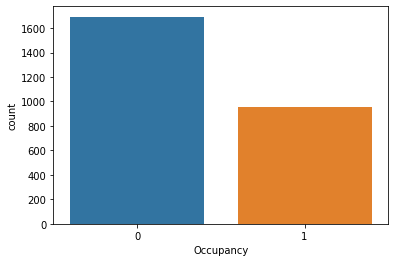

In [0]:
sns.countplot(y_test)

Ahora procedamos a crear nuestro modelo LSTM

In [0]:
keras.backend.clear_session()

In [0]:
model = keras.models.Sequential([
                                 keras.layers.LSTM(5, return_sequences=True, input_shape=[None, 4]),
                                 keras.layers.LSTM(5),
                                 keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.AUC(num_thresholds=200)])

In [0]:
model.fit(X_train,y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test))

Train on 8124 samples, validate on 2646 samples
Epoch 1/5
8124/8124 [==============================] - 9s 1ms/sample - loss: 0.2883 - auc: 0.9751 - val_loss: 0.2071 - val_auc: 0.9879
Epoch 2/5
8124/8124 [==============================] - 8s 1ms/sample - loss: 0.1246 - auc: 0.9893 - val_loss: 0.1596 - val_auc: 0.9891
Epoch 3/5
8124/8124 [==============================] - 8s 985us/sample - loss: 0.0939 - auc: 0.9918 - val_loss: 0.1314 - val_auc: 0.9903
Epoch 4/5
8124/8124 [==============================] - 8s 980us/sample - loss: 0.0794 - auc: 0.9935 - val_loss: 0.1180 - val_auc: 0.9920
Epoch 5/5
8124/8124 [==============================] - 8s 989us/sample - loss: 0.0707 - auc: 0.9958 - val_loss: 0.1103 - val_auc: 0.9930
